In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [17]:
class layer_polinomio(Layer):
  def __init__(self):
    super(layer_polinomio, self).__init__()
    '''
    add_weight    - grega un parámetro entrenable
    'a_x'         - nombre del parámetro
    shape(1, 1)   - matriz de 1x1 (escalar)
    '''
    self.a_0 = self.add_weight('a_0', shape = (1, 1))
    self.a_1 = self.add_weight('a_1', shape = (1, 1))
    self.a_2 = self.add_weight('a_2', shape = (1, 1))
    self.a_3 = self.add_weight('a_3', shape = (1, 1))

  # def call(self, inputs):
  def call(self, x): # La variable es x
    return self.a_0 + self.a_1 * x + self.a_2 * x**2 + self.a_3 * x**3

In [18]:
# from keras.src.engine.sequential import training
loss_tracker = keras.metrics.Mean(name = 'loss')
class funcion(Sequential):
  @property
  def metrics(self):
    return [loss_tracker]

  def train_step(self, data):
    batch_size = 100
    _x = tf.random.uniform((batch_size, 1), minval = -1, maxval = 1)
    f = tf.math.cos(2. * _x)

    with tf.GradientTape() as tape:
      y_pred = self(_x, training = True)
      loss = tf.math.reduce_mean(tf.math.square(y_pred - f))

    grads = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    loss_tracker.update_state(loss)

    return {'loss': loss_tracker.result()}


In [19]:
model = funcion()

model.add(Dense(500, activation = 'tanh', input_shape = (1, )))
model.add(Dense(300, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(1))

model.summary()

Model: "funcion_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               1000      
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 181,501
Trainable params: 181,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = Adam(), metrics = ['loss'])
x = tf.linspace(-1, 1, 100)
history = model.fit(x, epochs = 10000, verbose = 0)

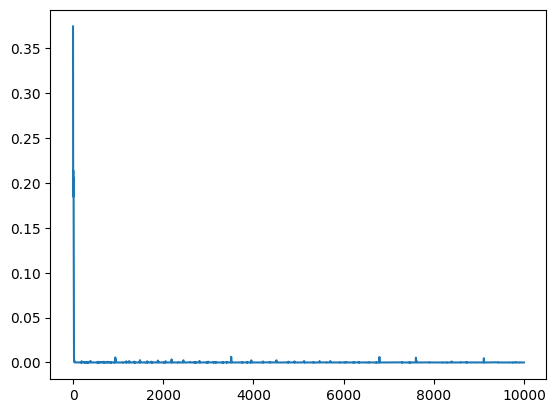

In [21]:
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 2ms/step


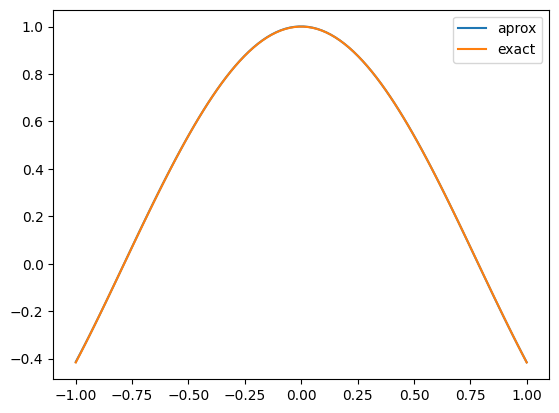

In [23]:
a = model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, tf.math.cos(2. * x), label="exact")
plt.legend()
plt.show()